# I. Introduction

With the upsurge in Islamophobia rhetoric in recent months that is starkly reminiscient of a post-9/11 climate in the US and the West, the Muslim Public Affairs Committee (MPAC) has tasked the Center for Security, Technology, and Policy (CSTP) with locating trends within this discourse.

 ## Problem Understanding


The goal of this project is to identify dominant themes and patterns underpinning Islamophobic rhetoric in order to better inform research and policy recommendations. Specifically, this project focuses on extracting actionable insights by identifying recurring language patterns, narrative frames, and potential changes in discourse that can support effective advocacy, monitoring, and community safety responses. To accomplish this, we analyze a dataset of public posts from X (formerly Twitter) from a variety of users. 

Because large-scale manual review of social media content is not feasible, this project also includes a lightweight machine learning component designed to support scalable detection. First, we build a baseline NLP classifier that can distinguish between Islamophobic and non-Islamophobic tweets. Then, using the tweets identified as Islamophobic, we apply thematic analysis (e.g., clustering/topic discovery) to surface the most common narratives and rhetorical patterns present in the dataset. This combined approach supports both detection (what content should be flagged for review) and understanding (what narratives are driving the discourse).

#### Defining Islamophobia

Islamophobia as a concept can encompass a variety of rhetoric, depending on the definition one uses. For the purposes of this project, we will use the definition of Islamophobia used by the [Bridge Initiative at Georgetown University](https://bridge.georgetown.edu/about-us/what-is-islamophobia/), which posits that "*Islamophobia is an extreme fear of and hostility toward Islam and Muslims which often leads to hate speech, hate crimes, as well as social and political discrimination.*"

We use this definition in order to limit the scope of the investigation to rhetoric that echos fears and hatred of Islam and Muslims specifically. In order to maintain focus, tweets that are critical or antagonistic to Muslim-majority states, for example, would only be considered Islamophobic if the rhetoric used directly or implicitly attacks Islam as a religion or Muslims as a people.

### Project Scope
- The dataset consists of 1,619 tweets collected from X.
- The project creates a small, high-confidence manually labeled subset to train and evaluate a baseline classifier.
- The dataset is unlabeled. We will create a small set of 200 tweets, half labeled 0 for not Islamophobic, and the other half labeled 1 for Islamophobic.
- The modeling approach prioritizes interpretability and speed, using traditional NLP features (e.g., TF-IDF) and linear models rather than computationally expensive deep learning approaches.
- After classification, the subset of Islamophobic tweets is used to perform theme discovery, producing interpretable clusters/topics supported by representative examples and key terms.
- Due to the sensitive nature of the domain and the risk of harm from misclassification, the classifier is framed as a decision-support tool rather than an automatic enforcement system.

### Success Criteria
Success for this project can be measured by answering three questions:

**1. Is the classifier functional and reliable enough to support triage?**
- Performance will be evaluated using a confusion matrix and metrics such as precision, recall, and F1-score, with a particular emphasis on precision to reduce harmful false positives.

**2. Did we learn something real, clear, and repeatable about the discourse?**
- Thematic outputs should produce coherent categories of Islamophobic rhetoric (e.g., dehumanization, collective blame, exclusionary policy narratives, conspiracy framing) supported by representative tweets and distinguishing keywords.

**3. Can the insights inform real decisions?**
- Findings should translate into concrete, stakeholder-relevant outputs such as narrative summaries, language patterns, and recommendations that can inform policy memos, rapid response, or platform monitoring strategies.

### Limitations & Ethics
Islamophobia detection is highly context-dependent and can involve sarcasm, coded language, and quotation, making the task difficult even for human reviewers. Because the dataset does not include ground-truth labels, this project relies on a small manually labeled subset, which introduces subjectivity and may not reflect all language patterns in the full dataset. The classifier may also produce false positives when tweets mention Islam or Muslims in neutral or advocacy contexts. For these reasons, the model should be treated as a decision-support tool for triage rather than an automatic enforcement mechanism. A production-ready version would require larger labeled data, multiple annotators, and additional bias/fairness evaluation. 

# II. Data Understanding

This dataset contains 1,619 public posts from X (formerly Twitter). Each row represents a single post and includes the post text, metadata about the author account, and engagement metrics. The data is intended to support analysis of Islamophobic discourse by enabling both language-based analysis (what is being said) and impact-based analysis (how widely it spreads).

### Features
- `Date`: Timestamp associated with the post. This allows trend analysis over time (e.g., spikes in activity or engagement).
- `X Accounts`: The username or account identifier that published the post. This can be used to assess repetition, concentration of posting behavior, or high-volume accounts.
- `Post Link`: Direct URL to the post for auditing and transparency.
- `Post Text`: The main content of the tweet. This is the primary input feature for NLP tasks such as classification and theme discovery.
- `Retweets` / `Comments` / `Likes` / `Bookmarks` / `Views`: Engagement metrics that approximate reach and amplification. Views represent the broadest measure of exposure, while retweets and bookmarks may indicate stronger forms of engagement.
- `Custom Reports`: While this column is mostly empty, around 90 or so entries are marked as 'Islamophobic.' We will consider these entries as high-confidence labels and use them as a starting point to train our classifier.
- `Quick Notes`/ `Legistlative Tracker`/ `Workflow`:  These are almost entirly empty, and the few entries contain nothing of value for our purposes, and we will need to cut these to clean our dataset.

This dataset supports three core types of analysis:

**1. Classification**: Using the post text to train a classifier that can triage harmful content.

**2. Topic Modeling**: Identifying recurring narratives and language patterns within Islamophobic tweets (e.g., stereotypes, collective blame, exclusionary rhetoric).

**3. Impact Analysis**: Using engagement metrics, especially views and retweets, to understand which narratives are most amplified and hold higher degrees of salience, and therefore may pose greater public influence or harm.

### Quality Considerations

Several quality issues are present in this dataset:

- Missing or inconsistent labels: The dataset does not appear to have complete, standardized annotation fields. Some rows may contain partial labeling information, while most remain unlabeled.
- Context loss: Tweets are short and often depend on context (threads, quotes, sarcasm, or external links or links to other tweets). This creates ambiguity when interpreting intent.
- Noise in text: Tweet text may include URLs, mentions (@user), hashtags, emojis, or formatting artifacts that require preprocessing.
- Engagement bias: Views and engagement are influenced by account size, virality dynamics, and platform algorithms, not only the content itself, so they should be interpreted as approximate impact signals rather than direct measures of harm.
- Sampling bias: The dataset may not represent the full spectrum of Twitter discourse. It may be shaped by how the tweets were collected (search terms, accounts, timeframe).

Additionally, the scope of this project and the nature of this dataset combined to create a number of limitations:
- Our focus on identifying Islamophobia in particular leads us to exclude rhetoric containing other forms of hate and extremism, such as anti-Hindu or antisemitic rhetoric, which can often emanate from the same source or utilize overlapping forms of rhetoric.
- Some tweets are antagonostic towards ethnicities or countries, and do not constitute Islamophobia in the strict sense we outlined above.
- A large portion of the Islamophobic tweets present address particular social or political situations, such as controversies over mosques in Texas or the alleged fraud allegations of Somalis in Minnesota, which could potentially limit the extent of generalizability of identified themes.
- The vast majority of the tweets deal with the the US context specifically, which could limit the transnational dimensions of Islamophobia.

### Assumptions

To keep the project feasible in a short timeline, the project assumes the following:

- The post text contains enough signal to differentiate Islamophobic from non-Islamophobic content at a baseline level.
- A small high-confidence labeled subset can provide enough ground truth to evaluate a lightweight baseline model.
- The classified tweets can be clustered to extrect recurring themes and trends present within online Islamophobic discourse that can be generalized.
- Engagement metrics such as Likes and Retweets can help us better understand which narratives and themes are echoed the most and have more salience for the public.

### Model Selection

For efficiency, we will deploy two models and assess how they perform on training and test data Both models will incorporate **Term Frequency-Inverse Document Frequency (TF-IDF)**, which will be useful in determining the relative significance of terms used across the content under `Post Text` by weighing the frequency of the appearance of those terms within a tweet against their relative rarity across all tweets in the dataset.

1. `Logistic Regression`: This will be our baseline model as it is strong in text classification and relatively quick to train. The probabilities given by this model will potentially be useful for threshold tuning, and can provide us with the top words driving predictions.
2. `LinearSVM`: This model excels at high-dimensional sparse text, and is likewise quick to train and robust.

### Metrics

For our purposes of narrative and trend analysis, **False Positives are more harmful than False Negatives**. This is because, while it would be unfortunate to mistakenly classify tweets as not Islamophobic when they actually are, the impact of this misclassification on our trend analysis would be minimized by the fact that, according to our assumptions, there are trends and recurring themes across these tweets. However, it would be far more detrimental to our analysis if our 'bucket' of Islamophobic tweets were polluted by tweets that are not Islamophobic, as this would distort the themes we extract and the conclusions we draw from them.

Therefore, we will be using **Precision** as our primary metric of success, as this evaluates our ability to **keep False Positives out** and generate a high-confidence subset for analysis. In other words, it measures how 'pure' our Islamophobic bucket of tweets is, ensuring that the themes we extract are more cohesive and accurate.

### Cross-Validation

Since we are working with a relatiely limited set of labeled data of only 180 entries, we will need to ensure that our models are functioning competently and not by mere luck. We can do this by relying on cross-validation, which will run several data splits instead of just one, and will use `Stratified K-Means` to conduct those splits.

## Data Preparation

Several steps need to be taken before we are able to begin modeling and analyzing the data.

First, since the dataset is unlabeled, we went about labeling a smaller subset of the tweets ourselves by creating a `Label` column and assigning 0 for tweets that are not Islamophobic and 1 for tweets that are Islamophobic. There are 180 tweets total that are labeled with a class balance of 50-50. We will use this subset of tweets for training and testing our classifier models.

Next, we will take a number of steps to clean the dataset:
1. Removing the following columns as they do not provide information necessary for this investigation: `Quick Notes`, `Custom Reports`, `Workflow`, `Legislative Tracker`.
2. Remove data entries with tweets that are null values or only include hyperlinks or photos.
3. Replace hyperlinks included in tweets with standard tokens to reduce noise.
4. Fixing spelling errors contained in the `Post Text` columns.

In [153]:
# importing necessary libraries

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(42)

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans

from sklearn.metrics import precision_score, recall_score

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.simplefilter("ignore", UserWarning)
pd.options.mode.chained_assignment = None

In [89]:
# loading in our data

df = pd.read_csv('data/tweets_labeled.csv', header=0)

# making sure dataset loaded in properly

df.head(3)

,Date,X Accounts,Post Link,Post Text,Label,Retweets,Comments,Likes,Bookmarks,Views,Quick Notes,Custom Reports,Workflow,Legislative Tracker
0,1/8/2026,Nadia Rahman 駱雯,https://x.com/nadiarahmansf/status/20091324931...,The defining moment of the first congressional...,NaN,1062.0,155.0,6318.0,532.0,355035.0,NaN,NaN,NaN,NaN
1,1/8/2026,John Guandolo,https://x.com/JGuandolo54271/status/2009080087...,@WallStreetApes Diyanet Center of America\nISN...,NaN,3.0,0.0,14.0,1.0,426.0,NaN,NaN,NaN,NaN
2,1/7/2026,Pamela Hensley🇺🇸,https://x.com/i/status/2008756328928538637,There is an Iranian-run daycare in Los Angeles...,NaN,5571.0,328.0,34300.0,324.0,256927.0,NaN,NaN,NaN,NaN


In [90]:
df.shape

(1619, 14)

In [91]:
df.columns

Index(['Date', 'X Accounts', 'Post Link', 'Post Text', 'Label', 'Retweets',
       'Comments', 'Likes', 'Bookmarks', 'Views', 'Quick Notes',
       'Custom Reports', 'Workflow', 'Legislative Tracker'],
      dtype='object')

In [92]:
# removing unnecessary columns

df_clean = df.drop(columns=['Quick Notes', 'Custom Reports', 'Workflow', 'Legislative Tracker'])

# making sure the columns were removed correctly

df_clean.head(3)

,Date,X Accounts,Post Link,Post Text,Label,Retweets,Comments,Likes,Bookmarks,Views
0,1/8/2026,Nadia Rahman 駱雯,https://x.com/nadiarahmansf/status/20091324931...,The defining moment of the first congressional...,NaN,1062.0,155.0,6318.0,532.0,355035.0
1,1/8/2026,John Guandolo,https://x.com/JGuandolo54271/status/2009080087...,@WallStreetApes Diyanet Center of America\nISN...,NaN,3.0,0.0,14.0,1.0,426.0
2,1/7/2026,Pamela Hensley🇺🇸,https://x.com/i/status/2008756328928538637,There is an Iranian-run daycare in Los Angeles...,NaN,5571.0,328.0,34300.0,324.0,256927.0


In [93]:
# checking to see if there are any null entries under the `Post Text` column

df_clean['Post Text'].isna().sum()

7

In [94]:
# seeing which rows have null values

df_clean[df_clean["Post Text"].isna()]

,Date,X Accounts,Post Link,Post Text,Label,Retweets,Comments,Likes,Bookmarks,Views
1471,7/16/2025,W H Y T E_R Y K,https://twitter.com/RealWhyteRyk/status/194551...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1479,5/23/2025,🔻🇮🇶🇵🇸🇱🇧🇾🇪🇰🇵🇮🇷🔻,https://x.com/notbasrairaqi2/status/1925890468...,NaN,NaN,1.0,0.0,0.0,0.0,35.0
1501,5/22/2025,☭ 🪂🐶 Karl🔻Barx 🐶🪂☭,https://x.com/Karl_Barxxx/status/1925584865715...,NaN,NaN,26.0,1.0,276.0,5.0,6429.0
1502,5/22/2025,julia 🔻🪂,https://x.com/k1myojong/status/192560532264050...,NaN,NaN,67.0,4.0,329.0,14.0,5485.0
1504,5/22/2025,descriptive display name that is way too long and,https://x.com/mrgracemugabe/status/19255601712...,NaN,NaN,1300.0,40.0,17000.0,522.0,264200.0
1505,5/20/2025,Ihcen 🔻,https://x.com/ihcentoo/status/1924981885576303047,NaN,NaN,42.0,0.0,254.0,20.0,4473.0
1610,2/16/2025,SaltyGoy2083,https://x.com/goy208395235/status/189128417012...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
# dropping rows with null values in `Post Text`

df_clean = df_clean.dropna(subset=['Post Text']).copy()

# making sure it worked

df_clean['Post Text'].isna().sum()

0

### `clean_tweet()` Text Preprocessing Function
Now that we've removed null values under `Post Text` and unnecessary columns, next we need to clean the text we will be analyzing by handling hyperlinks and spelling errors.

We will do this by creating a a **function for text preprocessing** called `clean_tweet`() to perform the following:
- Lowercase text.
- Replace URLs with "URL".
- Replace @mentions with "USER".
- Normalize quotes.
- Removes extra whitespace.

In [96]:
def clean_tweet(text):
    
    # lowercase everything so words are treated the same regardless of capitalization
    text = text.lower()
    
    # standardizing quotation marks and apostrophes so text is consistent
    text = text.replace("“", '"').replace("”", '"')
    text = text.replace("’", "'").replace("‘", "'")
    
    # replacing hyperlinks with the token "URL"
    text = re.sub(r"http\S+|www\.\S+", " URL ", text)
    
    # replacing usernames with the token "USER"
    text = re.sub(r"@\w+", " USER ", text)
    
    # removing hashtags 
    text = text.replace("#", "")
    
    # replacing multiple spaces/white space with a single space and stripping extra spaces
    text = re.sub(r"\s+", " ", text).strip()
    
    return text

In [97]:
# applying the function to every row in the `Post Text` column\
# and creating a new column that we will use for modeling
df_clean['Clean Text'] = df_clean['Post Text'].apply(clean_tweet)

In [98]:
# making sure the function worked properly

df_clean.head(3)

,Date,X Accounts,Post Link,Post Text,Label,Retweets,Comments,Likes,Bookmarks,Views,Clean Text
0,1/8/2026,Nadia Rahman 駱雯,https://x.com/nadiarahmansf/status/20091324931...,The defining moment of the first congressional...,NaN,1062.0,155.0,6318.0,532.0,355035.0,the defining moment of the first congressional...
1,1/8/2026,John Guandolo,https://x.com/JGuandolo54271/status/2009080087...,@WallStreetApes Diyanet Center of America\nISN...,NaN,3.0,0.0,14.0,1.0,426.0,USER diyanet center of america isna uscmo icna...
2,1/7/2026,Pamela Hensley🇺🇸,https://x.com/i/status/2008756328928538637,There is an Iranian-run daycare in Los Angeles...,NaN,5571.0,328.0,34300.0,324.0,256927.0,there is an iranian-run daycare in los angeles...


#### With the whole data set cleaned up, we can start preparing ourselves for modeling.

### Extracting Labeled Data

As discussed above, only a smaller subset of the rows within the larger data set contain labels that we manually entered under the new column, `Label`, with a 0 indicating the tweet is not Islamophobic and a 1 indicating the tweet is Islamophobic.

We now need to extract those labeled rows so that we can use them to train our classifier and perform our modeling. We will refer to this as `df_labeled`.

In [99]:
# creating a new dataframe that contains only the labeled data from df_clean

df_labeled = df_clean[df_clean['Label'].notna()].copy()

# making sure it worked

df_labeled.shape

(200, 11)

In [100]:
# turning label values into integers
df_labeled['Label'] = df_labeled['Label'].astype(int)

df_labeled['Label'].value_counts()


Label
0    100
1    100
Name: count, dtype: int64

### Splitting the Data

Next, we will split our data into Training and Testing sets to use in our pipelines later.

In [101]:
# creating our X (features) and y (target) 

X = df_labeled['Clean Text']  
y = df_labeled'"Label']        

# creating the Train-Test Splits
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y # making sure the sets have the same class balance
)

# III. Data Modeling

Now that our data is preprocessed and our Training and Testing sets are ready, we'll start constructing our modeling pipelines.

## Pipelines

As discussed earlier, we will be creating two model pipelines:
1. `Logistic Regression` with TF-IDF Vectorizer
2. `LinearSVM` with TF-IDF Vectorizer

As a reminder, we are aiming to maximize **Precision** as our primary metric (and will consider the Recall score as supplementary), so we will tune the pipeline's parameters accordingly.

In [126]:
# creating the Logistic Regression + TF-IDF pipeline
logreg_pipe = Pipeline([
    ("tfidf", TfidfVectorizer(
        ngram_range=(1,2),      # include bigrams
        min_df=2,               # exclude words that only appear once
        max_df=0.95             # exclude words that are too common
    )), 
    ("clf", LogisticRegression(
        max_iter=2000, 
        class_weight="balanced"
    )) 
])

# creating the Linear SVM + TF-IDF pipeline
svm_pipe = Pipeline([
    ("tfidf", TfidfVectorizer(
        ngram_range=(1,2), 
        min_df=2, 
        max_df=0.95
    )),
    ("clf", LinearSVC(
        class_weight="balanced"
    ))
])

In [127]:
# creating for loop to fit and run the models and provide metric scores
models = {
    "LogReg": logreg_pipe,
    "LinearSVM": svm_pipe
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)

    print(f"\n{name}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall:    {recall:.3f}")


LogReg
Precision: 0.900
Recall:    0.900

LinearSVM
Precision: 0.864
Recall:    0.950


These are **excellent** scores. 

90% of the tweets classified as Islamophobic by the `Logistic Regression` model were actually Islamophobic, and it successfully caught 90% of Islamophobic tweets.

In comparison, the `LinearSVM` model let a few more False Positives slip by, however it let 5% fewer Islamophobic tweets slip through the cracks.

It tells us that both models successfully kept the vast majority of False Positives out of the Islamophobic tweets bucket, and each only missed a few Islamophobic tweets that it mistakenly marked as not Islamophobic.

However, these scores may be too good to be true, and could be due to our relatively small collection of labeled tweets. 

### Cross-Validation 

Since our labeled tweets were relatively small, numbering only 200, a single train-test split can give us misleading results, depending on how the data was split.

To increase our confidence in these models, we will add a **cross-validation** component to the pipelines and run them again, so we can be more sure of the models' competence when applying them to the wider dataset, as cross-validation can give more reliable estimates of how well the models perform across various data splits.

We will use `Stratified K-Fold` to create 5, equally balanced splits, or folds, of the data, and compare the models' performances across those 5 folds using standard deviation.

In [128]:
# setting up our cross-validation sets using Stratified K-Folds
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# creating for loop to run cross-validation through our model pipelines
for name, model in models.items():
    metrics = cross_validate(
        model,
        X,
        y,
        cv = cv,
        scoring = ['precision', 'recall']
    )

    precision_cv = metrics['test_precision']
    recall_cv = metrics['test_recall']

    # printing metrics across the folds with standard deviation
    print(f'\n{name}')
    print(f'Precision Score: {precision_cv.mean():.3f} ± {precision_cv.std():.3f}')
    print(f'Recall Score:    {recall_cv.mean():.3f} ± {recall_cv.std():.3f}')


LogReg
Precision Score: 0.822 ± 0.063
Recall Score:    0.830 ± 0.068

LinearSVM
Precision Score: 0.865 ± 0.050
Recall Score:    0.870 ± 0.068


As expected, cross-validation placed more scrutiny on our models' performances.

`Logistic Regression` created a more contaminated bucket of Islamophobic tweets, as it let an average of about 18% of False Positives. It also let an average of 17% of Islamophobic tweets slip through the cracks.

In comparison, `LinearSVM` on average produced slightly less contaminated buckets of Islamophobic tweets with a rate of 13% of False Positives. It was also more successful in preventing False Negatives, meaning let only let 13% of Islamophobic tweets slip through the cracks.

The `LinearSVM` model performed slightly better, so we will use it to classify the wider dataset.

### Classifying the Whole Dataset

Since our models are effective at minimizing False Positives, we can move ahead and use the `LinearSVM` model (since it had a slightly higher Recall Score) to classify the entire dataset. We'll have the model add a column to the entire dataset called `pred_label` which will indicate the tweet's classification. Then we'll pull the tweets identified as Islamophobic into a new dataframe, `df_anti_islam`.

Then we'll be able to move forward with extracting themes via Topic Modeling from the collection of tweets classified as Islamophobic.

Though we've established that our models are strong through cross-validation, we'll take an extra measure of caution and factor in our model's confidence in its classification using the model's `decision_function`, which gives a relative confidence metric. We'll focus on using the classified tweets that the model is relatively confident about by adding in a column in the dataframe `conf_score`.

In [129]:
# fitting the model pipeline on entire labeled data set
svm_pipe.fit(X, y)

# using the model to predict the entire unlabeled dataset and adding results to a new column
df_clean['Pred Label'] = svm_pipe.predict(df_clean['Clean Text'])

# creating a column with the degree of the model's confidence in the classification
df_clean['Conf Score'] = svm_pipe.decision_function(df_clean['Clean Text'])

# checking the model's classification results

df_clean['Pred Label'].value_counts()


Pred Label
1    859
0    753
Name: count, dtype: int64

According to our trained `LinearSVM` model, our entire dataset contains:
- 859 Islamophobic Tweets (53%)
- 753 not Islamophobic Tweets (47%)

Let's extract the Islamophobic tweets with higher degrees of confidence from the model into a new dataframe, `df_anti-Islam`, and we can use this to investigate themes and topics.

In [152]:
# pulling high confidence Islamophobic tweets
df_anti_islam = df_clean[df_clean['Conf Score'] >= 0.3].copy()

# checking how many tweets we pulled
df_anti_islam.shape

(458, 13)

So we have a total of about 458 tweets to work with.

## Topic Modeling 

With the 458 tweets we've confidently classified as Islamophobic in `df_anti_islam`, we can move to topic modeling, which can help us glean recurring themes based on the text contained in the dataset.

We'll use engagement metrics within the dataset, namely Likes and Retweets, as weights to help our topic modeling decipher which types of rhetoric gains more traction.

It should be noted that relative Likes and Retweets do not only correlate to salient rhetoric, but also reflects other factors like the posting accounts following and reach. So rather than conclude that "X rhetoric leads to higher engagement", it would be more accurate to frame our findings as "X rhetoric is **receiving higher engagement**".

We'll again use `TF-IDF` as our vectorizer, this time to pull out most recurring words.

To extract themes, we will feed the vectors created by `TF-IDF()` into a Truncated Singular Value Decomposition (`TruncatedSVD()`) model, due to its ability to process sparse data efficiently. Then we can use `KMeans()` to create clusters out of those modeled vectors, allowing us to see which terms cluster together and learn which themes can be gleaned from the tweets.

In [182]:
# vectorizing our text
tfidf = TfidfVectorizer(
    ngram_range=(1,2), 
    min_df=2, 
    max_df=0.90
)
X = tfidf.fit_transform(df_anti_islam['Clean Text'])

# feeding data into SVD model
svd = TruncatedSVD(
    n_components=50, 
    random_state=42
)
X_svd = svd.fit_transform(X)

# filtering the data into 5 clusters
kmeans = KMeans(
    n_clusters=5, 
    random_state=42, 
    n_init='auto'
)
df_anti_islam['Theme'] = kmeans.fit_predict(X_svd)

# pulling the themes out
terms = tfidf.get_feature_names_out()

Next we'll run a for loop to display the major themes and top related words underneath each theme.

In [183]:
for t in sorted(df_anti_islam['Theme'].unique()):
    idx = df_anti_islam['Theme'] == t
    mean_tfidf = X[idx].mean(axis=0)
    top_idx = np.asarray(mean_tfidf).ravel().argsort()[-30:][::-1]

    print(f"\nTHEME {t}")
    print(", ".join([terms[i] for i in top_idx]))


THEME 0
to, islam, is, we, america, url, the, it, and, our, islam is, be, deport, in, from, sharia, needs to, not, needs, this, need, every, sharia law, america url, no, of, to be, law, must, has

THEME 1
the, and, texas, is, islamic, this, to, sharia, in, of, epic, are, it, city, not, they, this is, he, that, just, epic city, their, for, you, mosque, isn, in texas, about, qadhi, with

THEME 2
the, of, in, to, is, url, and, dearborn, are, islam, for, they, america, it, will, we, on, this, islamic, texas, in the, of the, muslims, muslim, that, have, be, our, people, michigan

THEME 3
brotherhood, muslim brotherhood, terrorist, terrorist organization, organization, the muslim, the, muslim, cair, as, as terrorist, and, to, user, url, brotherhood as, designated, designate, foreign, designating, foreign terrorist, is, trump, as foreign, designated as, president, be, president trump, designation, executive order

THEME 4
islamization of, the islamization, islamization, of america, costs url

## Evaluation

Based on the themes clustered above, we can understand a number of trends occurring in Islamophobic discourse right now. Let's take a moment to evaluate what these Themes might tell us, and if they are useful at all. 
- **Theme 0**: vague; we can perhaps conclude that this theme deals with fear of Sharia law in the US, though it's inconclusive.
- **Theme 1**: we can conclude that there is heightened interest and attention on Texas, where Islamophobic personalities have stirred tensions around the growing Muslim population and a perceived increase in mosques. Tellingly, this cluster reflects an agitation against the the [East Plano Islamic Center (EPIC) City](https://en.wikipedia.org/wiki/EPIC_City,_Texas) project, which is a master-planned Islamic community-centered residential project in Texas. Yasir Qadhi, an Islamic scholar affiliated with Dallas-based Qalam Institute, seems to feature prominently in this theme.
- **Theme 2**: similar to Theme 1, this cluster appears to be concerned with a particular locale, being Dearborn, MI, known for its high concentration of Muslim and Arab residents. The presence of "Texas" here may indicate that many are drawing connections between the two sites, though we'd have to investigate further to confirm this and the nature of these connections.
- **Theme 3**: This may be the only explicitly political theme among these clusters, indicating an increased interest in the Muslim Brotherhood as well as fear of its alleged presence and activity in the US. The presence of CAIR (which the the Council on American Islamic Relations) in this cluster may confirm this conclusion considering recent moves by the Governors of Florida and Texas to impose restrictions on CAIR activity under the allegation of its connection to the Muslim Brotherhood.
- **Theme 4**: This reflects a more general concern with perceived Islamization of the US. The presence of "Texas" yet again may further confirm heightened attention around Texas specifically as what Islamophobes posit as a battleground of site of struggle against the alleged Islamization of America.

Now that we have more of a grasp on what these themes represent in public discourse, we can try to measure the salience of each of these themes within Islamophobic discourse online. We'll do so by plotting the relative engagement tweets within each theme received in our dataset. 

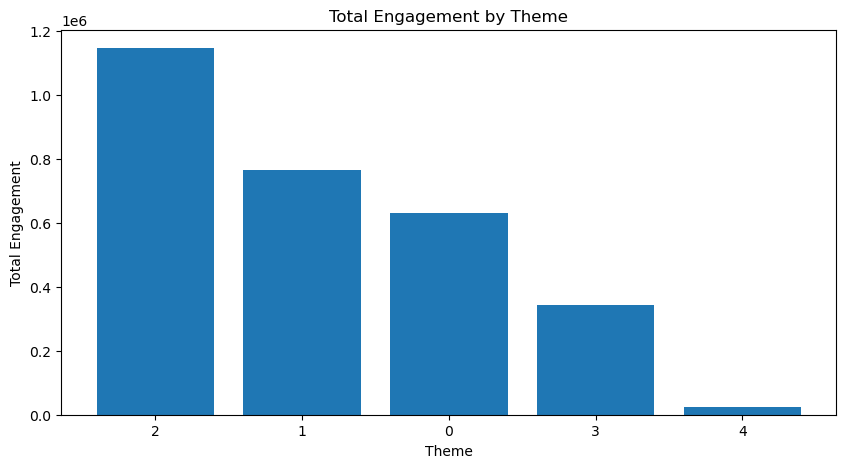

In [180]:
# creating Engagement metric column
df_anti_islam['Engagement'] = (
    df_anti_islam['Likes'].fillna(0) +
    df_anti_islam['Retweets'].fillna(0)
)

# grouping themes by relative engagement
theme_stats = (
    df_anti_islam.groupby('Theme')['Engagement']
    .agg(count = 'count', total='sum', average='mean')
    .sort_values('total', ascending=False)
)

# plotting themes according to engagement
plt.figure(figsize=(10,5))
plt.bar(theme_stats.index.astype(str), theme_stats['total'])
plt.title('Total Engagement by Theme')
plt.xlabel('Theme')
plt.ylabel('Total Engagement')
plt.show()

Here's what this graph tells us:
1. The top two themes with the most engagement are the two themes dealing with specific locales. There is by far the most engagement with Theme 2, which deals with Dearborn, MI and potentially draws connection to Texas. The second most prominent theme is Theme 1, which deals with Texas directly and the proposed EPIC City project.
2. The third-most engaged theme is Theme 0, that we found to be more vague and are hypothesizing reflects a more general fear of Sharia Law in the US.
3. There is a growing fear of the Muslim Brotherhood in the US, which has become more of a salient talking point among the Islamophobic Right. Experience tells us that often times, concern with Muslim Brotherhood presence is rooted in a projected fear of actors in the Middle East and international politics more generally, and the presence of CAIR in this theme indicates that attempts to connect the civil rights organization to international actors may be resonating with some figures and the public. The explicitly poltiical nature of this theme, that it is centered around a political organization, can lead us to conclude that geopolitical developments in the Middle East over the past two plus years has had some sort of impact on Islamophobic discourse. We would have to investigate this to better unpack the theme and its significance.
4. Theme 4, dealing with general fear of Islamization, appears to have the least engagement. This could lead us to believe that Islamophobic discourse centered around a kinetic situation posits more immediate stakes and therefore receives more engagement, or that prominent online figures choose to focus their rhetoric around these kinetic situations. We would need to investigate further to better understand this.

# IV. Conclusion

We were tasked with better understanding the salient and prominent currents fueling Islamophobic rhetoric online. To do this, we were given a dataset containing 1,619 tweets that expressed some sort of hateful or extreme ideas.

We understood that the nature of our mission in this investigation made False Positives more msotly than False Negatives, as we wanted to minimize potential contamination of our analysis of Islamophobic tweets, placing primary importance on **Precision** as a metric of success.

We utilized this dataset to conduct the following investigation:
1. Manually labeled a sample of 200 tweets, half containing non-Islamophobic tweets and half containing Islamophobic tweets.
2. Trained binary classifiers on this subset with the assistance of `TF-IDF()` and evaluated their performance according to Precision as a primary metric and Recall as a secondary metric, and used `cross-validation` to confirm the success of these models.
3. Applied the more successful trained model, `LinearSVD()`, on the entire unlabeled dataset, and split all tweets into buckets of Islamophic and non-Islamophobic tweets. We also used the `decision_function` within the classifier to attribute relative confidence scores for the classifications.
4. Pulled the tweets labeled Islamophobic by the classifier with relatively higher degrees of confidence, numbering 458 tweets total.
5. Vectorized those 458 Islamophobic tweets using `TF-IDF` and ran those vectors into `TruncatedSVD()` to capture patterns in the data.
6. Used Topic Modeling via `KMeans()` to cluster those patterns and grouping commonly used and related terms into Themes.
7. Ranked the relative salience and impact of each of those Themes by creating a visualization that used 'Likes' and 'Retweet' metrics in the dataset as proxies for levels of engagement, and displayed the engagement that each Theme received.

### Evaluating Success Criteria
At the outset of this investigation, we laid out three questions with which we intended to evaluated the investigation's results. We will repeat them here and respond according to our output:
**1. Is the classifier functional and reliable enough to support triage?**

- Answer: While the classifier is functional within the confines of this particular project, **we cannot confidently assert that our classifier is sufficiently equipped for general application and triage**. This is mainly due to limitations pertaining to the dataset itself, which will be elaborated upon in the Limitations section below.

**2. Did we learn something real, clear, and repeatable about the discourse?**

- Answer: **Yes**, we were able to ascertain tangible themes contained within the dataset that reflect prominent currents in Islamophobic rhetoric posted and amplified on social media.

**3. Can the insights inform real decisions?**

- Answer: **Yes**, we were able to utilize wider contextual understanding of recent developments and trends rooted in domain knowledge to understand social and political causes animating major currents in Islamophobic discourse, and can effectively use this deeper understanding to inform recommendations to interested actors.

## Limitations

Since we were not in control of how the data was collected, there are a number of limitations on our investigation arising from the dataset:
1. We do not know the degree of its veracity or how representative it is. For example, is the prevalence of tweets pertaining to Dearborn and Texas due to their current salience in the moment? Or was the creator of the dataset specifically looking to capture discourse on those two sites of tension?
2. There is an imbalance in the dates the tweets were collected: we can't know if the reason there are far more Islamophobic tweets in 2025 than in 2023 is due to a surge in Islamophobia, or due to the timing of when/how the dataset was collected.
3. There is an outsized presence of a handful of virulent Islamophobic personalities, such as Amy Menk or Laura Loomer, which more than likely skewed our classifier's ability to understand the nuances of Islamophobic discourse. Is it that these handful of figures are the driving forces of Islamophobic discourse, or was the creator the dataset intentionally keeping a close eye on them?
4. Many of the tweets contained photos with text that was not transcribed, so we were unable to factor in the language used on those photos in our modeling.

Furthermore, our decision to zero in on a strict definition of Islamophobia allowed us to be more focused in our modeling, but most likely caused us to miss more nuanced topics:
1. To what extent is a xenophobic fear of certain immigrant communities tied to Islamophobia?
2. In what ways does more subtle forms of Islamophobia inform opinions on international matters?

number of clusters

## Recommendations

## Next Steps